In [1]:
import os
import pandas as pd
%matplotlib inline
from newsapi import NewsApiClient
import nltk

In [2]:
# Download/Update the VADER Lexicon
nltk.download("vader_lexicon")
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\thesw\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [3]:
# Read your api key environment variable

# Retrieve the News API key
news_api = os.getenv("news_api")

In [4]:
# Create a newsapi client

newsapi = NewsApiClient(api_key=news_api)

In [5]:
# Fetch the Bitcoin news articles

bitcoin_en = newsapi.get_everything(
    q="Bitcoin", language="en", page_size=100
)

# Show the total number of news
bitcoin_en["totalResults"]

4357

In [6]:
# Fetch the Ethereum news articles

ethereum_en = newsapi.get_everything(
    q="Ethereum", language="en", page_size=100
)

# Show the total number of news
ethereum_en["totalResults"]

937

In [7]:
# Create the Bitcoin sentiment scores DataFrame

# Define a function to get the sentiment scores
def get_sentiment_scores(text):
    sentiment_scores = {}

    # Sentiment scoring with VADER
    text_sentiment = analyzer.polarity_scores(text)

    sentiment_scores["text"] = text
  
    sentiment_scores["Compound"] = text_sentiment["compound"]
    sentiment_scores["Positive"] = text_sentiment["pos"]
    sentiment_scores["Neutral"] = text_sentiment["neu"]
    sentiment_scores["Negative"] = text_sentiment["neg"]


    return sentiment_scores


In [8]:
# Empty list to store the DataFrame structure
sentiments_data = []

# Loop through all the news articles
for article in bitcoin_en["articles"]:
    try:
        # Get sentiment scoring using the get_sentiment_score() function
        sentiments_data.append(
            get_sentiment_scores(
                article["content"],
                
            )
        )

    except AttributeError:
        pass

# Create a DataFrame with the news articles' data and their sentiment scoring results
bitcoin_en_df = pd.DataFrame(sentiments_data)

bitcoin_en_df.head()

,Compound,Negative,Neutral,Positive,text
0,-0.1531,0.039,0.961,0.000,Less than two miles from Icelands Reykjavik ai...
1,0.2999,0.100,0.796,0.104,"Whether Bitcoin, an immaterial resource derive..."
2,0.0000,0.000,1.000,0.000,High school students in France may be among th...
3,0.4404,0.000,0.941,0.059,TL;DR: The in-depth Complete Blockchain and Et...
4,0.5070,0.000,0.931,0.069,Our robot colleague Satoshi Nakaboto writes ab...


In [9]:
# Create the ethereum sentiment scores DataFrame

# Empty list to store the DataFrame structure
sentiments2_data = []

# Loop through all the news articles
for article in ethereum_en["articles"]:
    try:
        # Get sentiment scoring using the get_sentiment_score() function
        sentiments2_data.append(
            get_sentiment_scores(
                article["content"],
                
            )
        )

    except AttributeError:
        pass

# Create a DataFrame with the news articles' data and their sentiment scoring results
ethereum_en_df = pd.DataFrame(sentiments2_data)

ethereum_en_df.head()

,Compound,Negative,Neutral,Positive,text
0,0.3595,0.000,0.945,0.055,Sharding and scalability. Transactions per sec...
1,0.4404,0.000,0.941,0.059,TL;DR: The in-depth Complete Blockchain and Et...
2,0.6249,0.000,0.900,0.100,Disrupt Berlin is right around the corner. And...
3,0.4601,0.000,0.915,0.085,"he plaBy now, you should almost certainly know..."
4,-0.3089,0.055,0.945,0.000,Blockchain has been picking up the pace since ...


In [10]:
# Describe the Bitcoin Sentiment

bitcoin_en_df.describe()

,Compound,Negative,Neutral,Positive
count,97.000000,97.000000,97.000000,97.000000
mean,0.154226,0.040072,0.897670,0.062278
std,0.439166,0.055159,0.075506,0.052975
min,-0.831600,0.000000,0.640000,0.000000
25%,-0.077200,0.000000,0.853000,0.000000
50%,0.202300,0.000000,0.926000,0.066000
75%,0.507000,0.068000,0.945000,0.088000
max,0.914100,0.271000,1.000000,0.249000


In [11]:
# Describe the Ethereum Sentiment

ethereum_en_df.describe()

,Compound,Negative,Neutral,Positive
count,95.000000,95.000000,95.000000,95.000000
mean,0.178014,0.027189,0.916768,0.056032
std,0.407393,0.048971,0.071184,0.053723
min,-0.877900,0.000000,0.551000,0.000000
25%,0.000000,0.000000,0.892000,0.000000
50%,0.296000,0.000000,0.931000,0.057000
75%,0.485300,0.045500,0.954500,0.098000
max,0.757900,0.287000,1.000000,0.239000


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin had the highest mean positive score of 0.0605 compared to 0.056 from Ethereum

Q: Which coin had the highest compound score?

A: Ethereum had the highest compound score of 0.25 compared to 0.17 from Bitcoin

Q. Which coin had the highest positive score?

A: Bitcoin had the highest positive score of 0.065 compared to 0.057 from Ethereum.

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [12]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [13]:
# Expand the default stopwords list if necessary

print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [14]:
lemmatizer = WordNetLemmatizer()

# Complete the tokenizer function
def tokenizer(text):
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    tokens = [word.lower() for word in lem if word.lower() not in sw]
    return tokens
    
    

In [15]:
# Create a new tokens column for bitcoin

bitcoin_en_df["tokens"] = bitcoin_en_df["text"].apply(tokenizer)
bitcoin_en_df.head()

,Compound,Negative,Neutral,Positive,text,tokens
0,-0.1531,0.039,0.961,0.000,Less than two miles from Icelands Reykjavik ai...,"[less, two, mile, icelands, reykjavik, airport..."
1,0.2999,0.100,0.796,0.104,"Whether Bitcoin, an immaterial resource derive...","[whether, bitcoin, immaterial, resource, deriv..."
2,0.0000,0.000,1.000,0.000,High school students in France may be among th...,"[high, school, student, france, may, among, fi..."
3,0.4404,0.000,0.941,0.059,TL;DR: The in-depth Complete Blockchain and Et...,"[tldr, indepth, complete, blockchain, ethereum..."
4,0.5070,0.000,0.931,0.069,Our robot colleague Satoshi Nakaboto writes ab...,"[robot, colleague, satoshi, nakaboto, writes, ..."


In [16]:
# Create a new tokens column for ethereum

ethereum_en_df["tokens"] = ethereum_en_df["text"].apply(tokenizer)
ethereum_en_df.head()

,Compound,Negative,Neutral,Positive,text,tokens
0,0.3595,0.000,0.945,0.055,Sharding and scalability. Transactions per sec...,"[sharding, scalability, transactions, per, sec..."
1,0.4404,0.000,0.941,0.059,TL;DR: The in-depth Complete Blockchain and Et...,"[tldr, indepth, complete, blockchain, ethereum..."
2,0.6249,0.000,0.900,0.100,Disrupt Berlin is right around the corner. And...,"[disrupt, berlin, right, around, corner, plent..."
3,0.4601,0.000,0.915,0.085,"he plaBy now, you should almost certainly know...","[plaby, almost, certainly, know, ethereum, eth..."
4,-0.3089,0.055,0.945,0.000,Blockchain has been picking up the pace since ...,"[blockchain, ha, picking, pace, since, incepti..."


---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [17]:
from collections import Counter
from nltk import ngrams

In [18]:
# Generate the Bitcoin N-grams where N=2

bitcoin_tokens = [item for items in bitcoin_en_df.tokens.to_list() for item in items ]
bigram_count_bitcoin = Counter(ngrams(bitcoin_tokens, n=2))
bigram_count_bitcoin.most_common(20)

[(('satoshi', 'nakaboto'), 38),
 (('bitcoin', 'btc'), 25),
 (('char', 'robot'), 19),
 (('robot', 'colleague'), 19),
 (('colleague', 'satoshi'), 19),
 (('nakaboto', 'writes'), 19),
 (('writes', 'bitcoin'), 19),
 (('every', 'fucking'), 19),
 (('fucking', 'daywelcome'), 19),
 (('daywelcome', 'another'), 19),
 (('another', 'edition'), 19),
 (('edition', 'bitcoin'), 19),
 (('bitcoin', 'today'), 19),
 (('today', 'satoshi'), 19),
 (('nakaboto', 'tell'), 19),
 (('tell', 'whats'), 19),
 (('whats', 'going'), 19),
 (('going', 'bitcoin'), 19),
 (('bitcoin', 'past'), 19),
 (('past', 'hour'), 19)]

In [19]:
# Generate the Ethereum N-grams where N=2

ethereum_tokens = [item for items in ethereum_en_df.tokens.to_list() for item in items ]
bigram_count_ethereum = Counter(ngrams(ethereum_tokens, n=2))
bigram_count_ethereum.most_common(20)

[(('early', 'morning'), 11),
 (('char', 'ethereumethereum'), 10),
 (('ethereum', 'ended'), 10),
 (('saw', 'ethereum'), 9),
 (('morning', 'intraday'), 9),
 (('ended', 'day'), 9),
 (('start', 'day'), 8),
 (('day', 'saw'), 8),
 (('char', 'bitcoin'), 7),
 (('intraday', 'high'), 7),
 (('price', 'action'), 5),
 (('ethereumethereum', 'fell'), 5),
 (('high', 'hitting'), 5),
 (('complete', 'blockchain'), 4),
 (('ethereum', 'programmer'), 4),
 (('programmer', 'bundle'), 4),
 (('bitcoin', 'ethereum'), 4),
 (('chairman', 'heath'), 4),
 (('heath', 'tarbert'), 4),
 (('technical', 'analysis'), 4)]

In [20]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [21]:
# Get the top 10 words for Bitcoin

token_count(bitcoin_tokens)

[('bitcoin', 98),
 ('char', 96),
 ('satoshi', 41),
 ('nakaboto', 38),
 ('cryptocurrency', 32),
 ('ha', 28),
 ('btc', 27),
 ('past', 22),
 ('say', 22),
 ('another', 21)]

In [22]:
# Get the top 10 words for Ethereum

token_count(ethereum_tokens)

[('char', 95),
 ('ethereum', 66),
 ('ha', 30),
 ('blockchain', 27),
 ('bitcoin', 25),
 ('day', 25),
 ('cryptocurrency', 21),
 ('morning', 16),
 ('price', 14),
 ('week', 13)]

# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [23]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

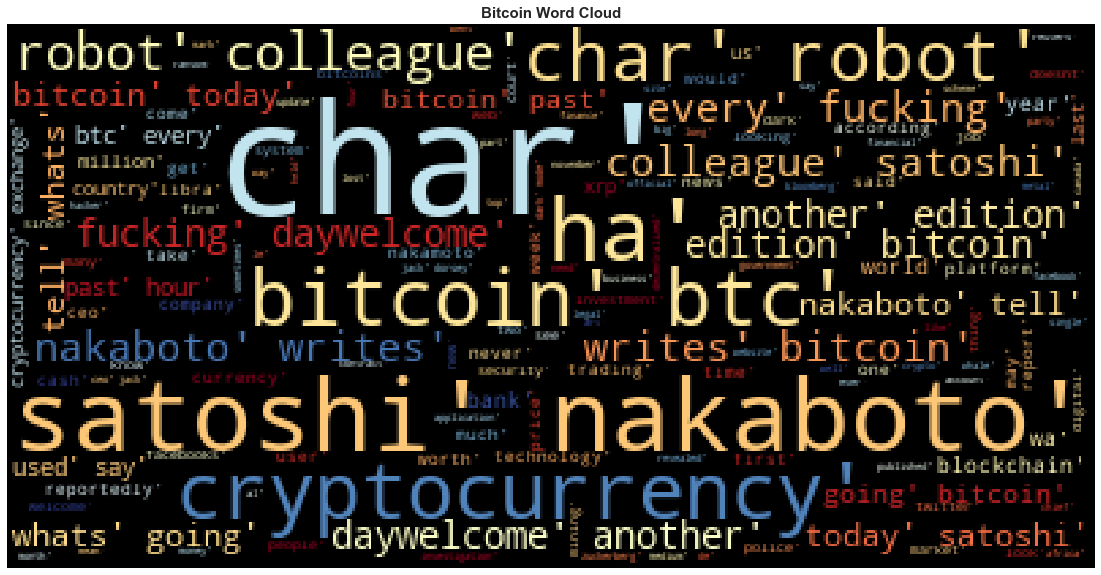

In [41]:
# Generate the Bitcoin word cloud



big_string_bitcoin=str(bitcoin_en_df["tokens"].tolist())


wordcloud = WordCloud(colormap="RdYlBu").generate(big_string_bitcoin)
fig_bow_cloud = plt.figure()
plot_bow_cloud = plt.imshow(wordcloud)
plot_bow_cloud = plt.axis("off")
fontdict = {"fontsize": 15, "fontweight": "bold"}
plot_bow_cloud = plt.title("Bitcoin Word Cloud", fontdict=fontdict)
plot_bow_cloud = plt.show()
plt.close(fig_bow_cloud)

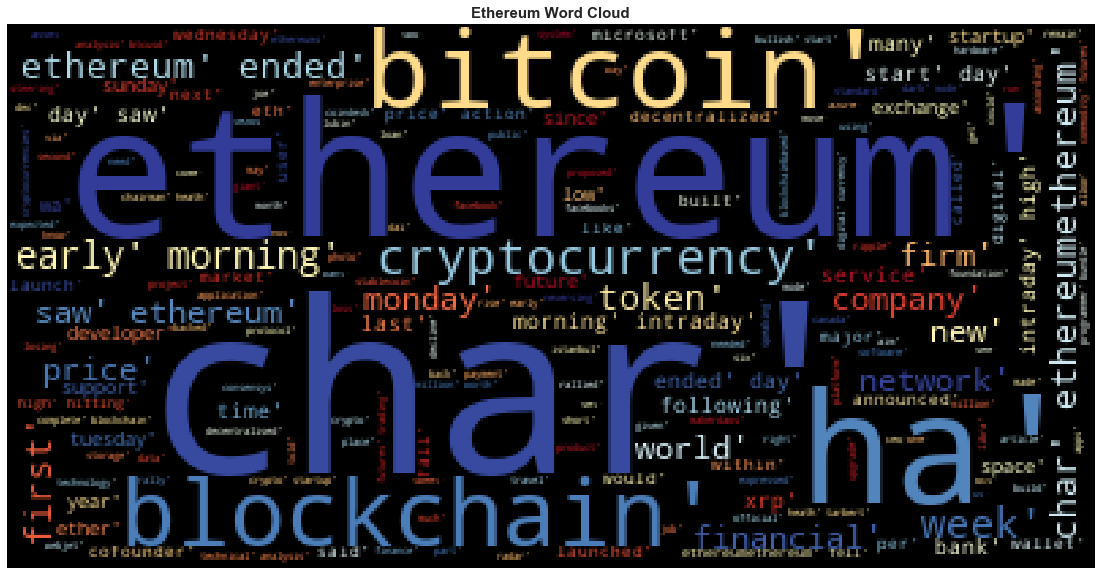

In [25]:
# Generate the Ethereum word cloud

big_string_ethereum=str(ethereum_en_df["tokens"].tolist())


wordcloud = WordCloud(colormap="RdYlBu").generate(big_string_ethereum)
fig_bow_cloud = plt.figure()
plot_bow_cloud = plt.imshow(wordcloud)
plot_bow_cloud = plt.axis("off")
fontdict = {"fontsize": 15, "fontweight": "bold"}
plot_bow_cloud = plt.title("Ethereum Word Cloud", fontdict=fontdict)
plot_bow_cloud = plt.show()
plt.close(fig_bow_cloud)

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [26]:
import spacy
from spacy import displacy

In [27]:
# Optional - download a language model for SpaCy
# !python -m spacy download en_core_web_sm

In [28]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [29]:
# Concatenate all of the bitcoin text together

bitcoin_text= " ".join(bitcoin_en_df.text.to_list())
print(bitcoin_text)

Less than two miles from Icelands Reykjavik airport sits a nondescript metal building as monolithic and drab as a commercial poultry barn. Theres a deafening racket inside, too, but it doesnt come from clucking chickens. Instead, tens of thousands of whirring… [+3426 chars] Whether Bitcoin, an immaterial resource derived from hype and blind faith, will vanish into thin air is uncertain, but it will leave behind a dark cloud of carbon pollution. Cryptocurrency mining facilities use so much energy that the government of Abkhazia c… [+3402 chars] High school students in France may be among the first people in the world to actually understand how cryptocurrency works. 
The Next Web reports that the French education ministry, Le Ministère de lÉducation Nationale, will integrate cryptocurrency into its … [+1439 chars] TL;DR: The in-depth Complete Blockchain and Ethereum Programmer bundle is on sale for just $24 with the code 20LEARN20.
When it comes to Bitcoin, you get the gist: Cryptocurren

In [30]:
# Run the NER processor on all of the text

bitcoin_ner = nlp(bitcoin_text)

# Add a title to the document

bitcoin_ner.user_data["title"] = "Bitcoin NER"

In [31]:
# Render the visualization

displacy.render(bitcoin_ner,style='ent')

In [32]:
# List all Entities


for text in bitcoin_ner.ents:
    print(text.text, text.label_)

Less than two miles QUANTITY
Reykjavik airport FAC
tens of thousands CARDINAL
Whether Bitcoin PERSON
Abkhazia GPE
France GPE
first ORDINAL
The Next Web WORK_OF_ART
French NORP
Le Ministère de lÉducation Nationale ORG
Complete Blockchain and Ethereum Programmer ORG
just $24 MONEY
Bitcoin PERSON
Satoshi Nakaboto PERSON
Bitcoin PERSON
Bitcoin PERSON
Today DATE
Satoshi Nakaboto PERSON
Bitcoin PERSON
the past 24 hours TIME
Baudriallard PERSON
Satoshi Nakaboto PERSON
Bitcoin BTC PERSON
Bitcoin PERSON
Today DATE
Satoshi Nakaboto PERSON
Bitcoin PERSON
the past 24 hours TIME
Machiavelli PERSON
Satoshi Nakaboto PERSON
Bitcoin BTC PERSON
Bitcoin PERSON
Today DATE
Satoshi Nakaboto PERSON
Bitcoin PERSON
the past 24 hours TIME
Nietzsche PERSON
Time ORG
Satoshi Nakaboto PERSON
Bitcoin BTC PERSON
Bitcoin PERSON
Today DATE
Satoshi Nakaboto PERSON
Bitcoin PERSON
the past 24 hours TIME
Isaac Newton PERSON
Square FAC
Jack Dorsey PERSON
Bitcoin PERSON
Ghana GPE
just weeks DATE
Dorsey PERSON
Bitcoin PERSON


---

## Ethereum NER

In [36]:
# Concatenate all of the bitcoin text together

ethereum_string = " ".join(ethereum_en_df.text.to_list())



In [37]:
# Run the NER processor on all of the text

ethereum_ner = nlp(ethereum_string)


# Add a title to the document

ethereum_ner.user_data["title"] = "Ethereum NER"



In [38]:
# Render the visualization

displacy.render(ethereum_ner,style='ent')

In [39]:
# List all Entities

for text in ethereum_ner.ents:
    print(text.text, text.label_)

second ORDINAL
the Starship Blockchain LOC
Complete Blockchain and Ethereum Programmer ORG
just $24 MONEY
Bitcoin PERSON
Disrupt Berlin PERSON
December 11 and December 12 DATE
second ORDINAL
the year 2009 DATE
Santoshi Nakamoto PERSON
Nakamoto PERSON
Bitcoin PERSON
Blockchai GPE
Reuters ORG
Bitcoin PERSON
as much as 9% PERCENT
Wednesday DATE
June DATE
Facebook ORG
Mark Zuckerberg's PERSON
Libra GPE
Zuckerberg GPE
Swiss NORP
countrys NORP
Swiss NORP
Block ORG
$400 million MONEY
XRP ORG
Ponzi ORG
XRP ORG
London GPE
Elliptic NORP
less than 0.2 percent PERCENT
XRP ORG
The Royal Bank of Canada ORG
Last week DATE
Canadian NORP
The Royal Bank of Canada ORG
Opera ORG
one CARDINAL
Opera Mobile ORG
the day DATE
six CARDINAL
XRP ORG
Bitcoin PERSON
XRP ORG
third ORDINAL
Bitcoin PERSON
the Complete Blockchain and Ethereum Programmer Bundle ORG
just $29 MONEY
first ORDINAL
last week DATE
Chinese NORP
2021 DATE
first ORDINAL
last year DATE
Chinese NORP
Tencent GPE
countrys NORP
November DATE
20, DATE